In [0]:
# Nuevo entranamiento sin las letras J, Z, nothing.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# !pip install tensorflow-gpu==2.0.0

In [0]:
import tensorflow as tf

print(tf.__version__)

from tensorflow.keras.models                import Sequential, Model
from tensorflow.keras.layers                import *
from tensorflow.keras.preprocessing.image   import ImageDataGenerator
from tensorflow.keras.utils                 import to_categorical
from tensorflow.keras.optimizers            import SGD, RMSprop, Adam, Adagrad, Adadelta

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils import class_weight

import os
from glob import glob
import matplotlib.pyplot as plt
import random
import cv2
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
import seaborn as sns
import zlib
import itertools
import sklearn
import itertools
import scipy
import skimage
from skimage.transform import resize
import csv
from tqdm import tqdm
from sklearn import model_selection
from sklearn.model_selection import train_test_split, learning_curve,KFold,cross_val_score,StratifiedKFold
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
#from keras.applications.mobilenet import MobileNet
#from sklearn.metrics import roc_auc_score
#from sklearn.metrics import roc_curve
#from sklearn.metrics import auc
#import warnings
#warnings.filterwarnings("ignore")


1.15.0


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
# Para copiar el .zip desde drive a colab
!cp /content/drive/My\ Drive/Mezcla_2.0.zip ../content/Mezcla_2.0.zip

# Para descomprimir el .zip
!unzip Mezcla_2.0.zip

Archive:  Mezcla_2.0.zip
warning [Mezcla_2.0.zip]:  76 extra bytes at beginning or within zipfile
  (attempting to process anyway)
error [Mezcla_2.0.zip]:  reported length of central directory is
  -76 bytes too long (Atari STZip zipfile?  J.H.Holm ZIPSPLIT 1.1
  zipfile?).  Compensating...
   creating: Mezcla/A/
  inflating: Mezcla/A/A0001_test.jpg  
  inflating: Mezcla/A/A0002_test.jpg  
  inflating: Mezcla/A/A0003_test.jpg  
  inflating: Mezcla/A/A0004_test.jpg  
  inflating: Mezcla/A/A0005_test.jpg  
  inflating: Mezcla/A/A0006_test.jpg  
  inflating: Mezcla/A/A0007_test.jpg  
  inflating: Mezcla/A/A0008_test.jpg  
  inflating: Mezcla/A/A0009_test.jpg  
  inflating: Mezcla/A/A0010_test.jpg  
  inflating: Mezcla/A/A0011_test.jpg  
  inflating: Mezcla/A/A0012_test.jpg  
  inflating: Mezcla/A/A0013_test.jpg  
  inflating: Mezcla/A/A0014_test.jpg  
  inflating: Mezcla/A/A0015_test.jpg  
  inflating: Mezcla/A/A0016_test.jpg  
  inflating: Mezcla/A/A0017_test.jpg  
  inflating: Mezcla/A/

<class 'PIL.JpegImagePlugin.JpegImageFile'>


Using TensorFlow backend.


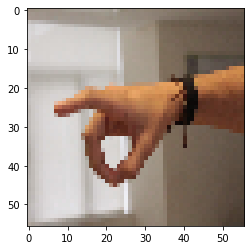

In [0]:
from keras.models import load_model

import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
k=2
pic = Image.open("//content/Mezcla/P/IMG_1318.JPG") 
pix = np.array(pic)
print(type(pic))

plt.imshow(pic.resize((28*k,28*k)))

In [0]:
from tensorflow.keras.preprocessing.image   import ImageDataGenerator

#Clasificamos las imagenes
bs = 64
k = 2
# Generador de imágenes de entrenamiento.
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=(0.3),
        zoom_range=(0.3),
        width_shift_range=(0.2),
        height_shift_range=(0.2),
        validation_split = 0.2,
        brightness_range=(0.05,0.85),
        horizontal_flip=False)

# Carga de imágenes al generador de entrenamiento desde directorio.
train_generator = train_datagen.flow_from_directory(
        '/content/Mezcla',
        class_mode='categorical',
        shuffle=True,
        target_size=(28*k, 28*k),
        color_mode = 'rgb', 
        subset = 'training',
        batch_size=bs)

valid_generator = train_datagen.flow_from_directory(
        '/content/Mezcla',
        class_mode='categorical',
        shuffle=True,
        target_size=(28*k, 28*k),
        color_mode = 'rgb', 
        subset = 'validation',
        batch_size=bs)

Found 59616 images belonging to 24 classes.
Found 14892 images belonging to 24 classes.


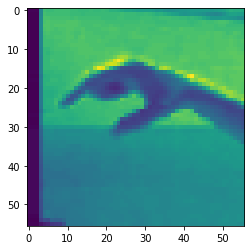

In [0]:
#Printeado de imagenes

#Qué significaba el primer 0 entre corchetes?
plt.imshow(next(train_generator)[0][2,...,0])
plt.show()

In [0]:
#Para saber a qué clase se le asocia a cada letra
print(train_generator.class_indices)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'K': 9, 'L': 10, 'M': 11, 'N': 12, 'O': 13, 'P': 14, 'Q': 15, 'R': 16, 'S': 17, 'T': 18, 'U': 19, 'V': 20, 'W': 21, 'X': 22, 'Y': 23}


In [0]:
import tensorflow as tf    
model = tf.keras.applications.VGG19()
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
574717952/574710816 [==============================] - 21s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112

In [0]:
# Conectando con Google Drive (ESTO ANTES DE EMPEZAR A ENTRENAR PORQUE PIDE CODIGO DE DRIVE)
import tensorflow as tf
from tensorflow.keras import *
from tensorflow.keras.layers import *
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()                       
drive = GoogleDrive(gauth)

In [0]:
##DEFINIMOS EL MODELO

# Batch size, epochs, etc
num_classes = 24
epochs = 25

# VGG19
# Importamos el modelo que queremos utilizar.
VGG19_model = tf.keras.applications.VGG19(input_shape=(28*k,28*k,3),
                                          include_top=False,
                                          weights='imagenet')

print(len(VGG19_model.layers))

for layer in VGG19_model.layers[:6]:
  layer.trainable = False

# # Desactivamos el entrenamiento de los parámetros de la red. 
# VGG19_model.trainable = False

# Creamos un nuevo modelo vacio.
model = tf.keras.Sequential()

# Añadimos el modelo preentrenado como si se tratase de una capa.
model.add(VGG19_model)

# Continuamos añadiendo más capas que sí serán entrenadas...
# model.add(Dense(64, input_dim=64,
#                 kernel_regularizer=regularizers.l2(0.01),

model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(64, kernel_regularizer=regularizers.l2(0.01), activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation = 'softmax'))

22


In [0]:
model.sumary()

NameError: ignored

In [0]:
!pip install livelossplot
from livelossplot.keras import PlotLossesCallback as PlotCallback

In [0]:
## EJECUCION DEL MODELO

from tensorflow.keras.optimizers import RMSprop

model.compile(loss="categorical_crossentropy", 
              optimizer= SGD(learning_rate=0.01),
              metrics=['accuracy'])

#Agregamos un callback
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau

checkpointer = ModelCheckpoint(filepath='model', verbose=1, save_best_only=True,
                               monitor = 'val_acc', mode = 'max')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=3, min_lr=0.000001)

# history = model.fit(x_train.reshape(x_train.shape[0], 28*k, 28*k, 3),
#                     y_trainHot, validation_data = (
#                     x_test.reshape(x_test.shape[0], 28*k, 28*k, 3), y_testHot), 
#                     epochs=epochs, 
#                     batch_size=batch_size, 
#                     callbacks = [checkpointer], 
#                     verbose=1)

history= model.fit_generator(train_generator,validation_data = valid_generator, 
                             callbacks = [reduce_lr, checkpointer], epochs=epochs)


    # ESTO DESPUES DE ENTRENAR (EN LA MISMA CELDA)
# Descargar el modelo en el drive y pc:
model.save('modelmiguel2.h5')
weights_file = drive.CreateFile({'title' : 'modelmiguel2.h5'})
weights_file.SetContentFile('modelmiguel2.h5')
weights_file.Upload()
drive.CreateFile({'id': weights_file.get('id')})

from google.colab import files
files.download('modelmiguel2.h5')


Epoch 1/25
233/932 [======>.......................] - ETA: 2:27 - loss: 1.7685 - acc: 0.6994
Epoch 00001: val_acc improved from -inf to 0.69944, saving model to model
932/932 [==============================] - 242s 259ms/step - loss: 2.7790 - acc: 0.4509 - val_loss: 1.7685 - val_acc: 0.6994
Epoch 2/25
233/932 [======>.......................] - ETA: 2:27 - loss: 1.4026 - acc: 0.7669
Epoch 00002: val_acc improved from 0.69944 to 0.76685, saving model to model
932/932 [==============================] - 238s 255ms/step - loss: 1.0936 - acc: 0.8710 - val_loss: 1.4026 - val_acc: 0.7669
Epoch 3/25
233/932 [======>.......................] - ETA: 2:26 - loss: 1.1476 - acc: 0.7862
Epoch 00003: val_acc improved from 0.76685 to 0.78619, saving model to model
932/932 [==============================] - 239s 257ms/step - loss: 0.7128 - acc: 0.9263 - val_loss: 1.1476 - val_acc: 0.7862
Epoch 4/25
631/932 [===================>..........] - ETA: 1:02 - loss: 0.5330 - acc: 0.9452

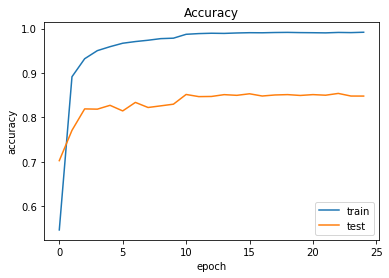

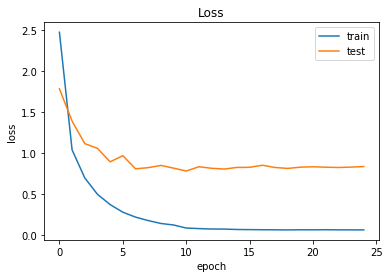

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.show()

In [0]:
# Copiar y descomprimir las imagenes test asl

# Para copiar el .zip desde drive a colab
!cp /content/drive/My\ Drive/Proyecto\ ML\ DL/asl-alphabet-test.zip ../content/asl-alphabet-test.zip

# Para descomprimir el .zip
!unzip asl-alphabet-test.zip


In [0]:
# Para borrar carpetas J, Z, del, space, nothing
!rm -r "/content/..."


In [0]:
# Clasificar las imagenes de asl-alphabet-test
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os


k=2
imageSize=28*k
test_dir = "/content/asl-alphabet-test/"

from tqdm import tqdm
def get_data(folder):
    """
    Load the data and labels from the given folder.
    """
    X = []
    y = []
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['A']:
                label = 0
            elif folderName in ['B']:
                label = 1
            elif folderName in ['C']:
                label = 2
            elif folderName in ['D']:
                label = 3
            elif folderName in ['E']:
                label = 4
            elif folderName in ['F']:
                label = 5
            elif folderName in ['G']:
                label = 6
            elif folderName in ['H']:
                label = 7
            elif folderName in ['I']:
                label = 8
            # elif folderName in ['J']:
                # label = 9
            elif folderName in ['K']:
                label = 9
            elif folderName in ['L']:
                label = 10
            elif folderName in ['M']:
                label = 11
            elif folderName in ['N']:
                label = 12
            elif folderName in ['O']:
                label = 13
            elif folderName in ['P']:
                label = 14
            elif folderName in ['Q']:
                label = 15
            elif folderName in ['R']:
                label = 16
            elif folderName in ['S']:
                label = 17
            elif folderName in ['T']:
                label = 18
            elif folderName in ['U']:
                label = 19
            elif folderName in ['V']:
                label = 20
            elif folderName in ['W']:
                label = 21
            elif folderName in ['X']:
                label = 22
            elif folderName in ['Y']:
                label = 23
            else:
                label = 24
            for image_filename in tqdm(os.listdir(folder + folderName)):
                img_file = Image.open(folder + folderName + '/' + image_filename).convert('L')
                if img_file is not None:
                    
                    img_file=img_file.resize((28*k,28*k))
                    img_arr = np.array(img_file)
                    X.append(img_arr)
                    y.append(label)
           # break
    X = np.array(X) #.replace(0, np.nan).to_sparse()
    y = np.array(y) #.replace(0, np.nan).to_sparse()
    return X,y
X_test_new, y_test_new = get_data(test_dir) 


In [0]:
# Accuracy
#  Con test
y_testHot_new = to_categorical(y_test_new, num_classes = 24)


accuracy = model.evaluate(X_test_new.reshape(X_test_new.shape[0], 28*k, 28*k, 1), y_testHot_new,batch_size=32)
print("Accuracy: ",accuracy[1])

In [0]:
##Abrir la camara

# Comprobando con la camara
# Codigo de Jessy para 
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [0]:
##Hacer la captura con la camara

from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))


In [0]:
# import numpy as np
# from PIL import Image
# from keras.models import load_model
# # Cargando imagenes en monocromatico (convert('L'))
# pic = Image.open("photo.jpg").convert('L')
# pix = np.array(pic)
# pix.shape
# picres=pic.resize((28*k,28*k))

abc = 'ABCDEFGHIKLMNOPQRSTUVWXY'
model = load_model('/content/CNNmodel_als.h5')
pix = np.array(picres)
pix.shape
pred = model.predict(pix.reshape(-1,28*k,28*k,1))

abc[np.argmax(pred)]
